In [1]:
import numpy as np

In [2]:
from octopuslite import DaskOctopusLiteLoader

In [3]:
import napari, os

# testing batches of transforms 

In [4]:
### image size versus typical crop (1200, 1600)

In [5]:
expt_dict = {}
for n in range(10,14):    
    expt_dict[f'ND00{n}']=[f'Pos{i}' for i in range(14)]

In [6]:
expt_dict

{'ND0010': ['Pos0',
  'Pos1',
  'Pos2',
  'Pos3',
  'Pos4',
  'Pos5',
  'Pos6',
  'Pos7',
  'Pos8',
  'Pos9',
  'Pos10',
  'Pos11',
  'Pos12',
  'Pos13'],
 'ND0011': ['Pos0',
  'Pos1',
  'Pos2',
  'Pos3',
  'Pos4',
  'Pos5',
  'Pos6',
  'Pos7',
  'Pos8',
  'Pos9',
  'Pos10',
  'Pos11',
  'Pos12',
  'Pos13'],
 'ND0012': ['Pos0',
  'Pos1',
  'Pos2',
  'Pos3',
  'Pos4',
  'Pos5',
  'Pos6',
  'Pos7',
  'Pos8',
  'Pos9',
  'Pos10',
  'Pos11',
  'Pos12',
  'Pos13'],
 'ND0013': ['Pos0',
  'Pos1',
  'Pos2',
  'Pos3',
  'Pos4',
  'Pos5',
  'Pos6',
  'Pos7',
  'Pos8',
  'Pos9',
  'Pos10',
  'Pos11',
  'Pos12',
  'Pos13']}

In [60]:
for i in expt_dict:
    for j in expt_dict[i]:
        image_path = f'/home/nathan/data/kraken/ras/{i}/{j}/{j}_images'
        if os.path.exists(image_path):
            images = DaskOctopusLiteLoader(image_path, crop = None)
            print(i, j, images['gfp'].shape)
        else:
            print(i, j, 'removing from dict')
            del expt_dict[i][int(j.replace('Pos',''))]

ND0010 Pos0 (1190, 1200, 1600)
ND0010 Pos1 (1193, 1352, 1688)
ND0010 Pos2 (1189, 1352, 1688)
ND0010 Pos3 (1189, 1352, 1688)
ND0010 Pos4 (1191, 1200, 1600)
ND0010 Pos5 (1193, 1352, 1688)
ND0010 Pos6 (1188, 1352, 1688)
ND0010 Pos7 (1195, 1352, 1688)
ND0010 Pos8 (1193, 1352, 1688)
ND0010 Pos9 (1190, 1352, 1688)
ND0010 Pos10 (1194, 1200, 1600)
ND0010 Pos11 (1191, 1352, 1688)
ND0010 Pos12 removing from dict
ND0011 Pos0 (1637, 1352, 1688)
ND0011 Pos1 (1640, 1352, 1688)
ND0011 Pos2 (1636, 1352, 1688)
ND0011 Pos3 (1638, 1352, 1688)
ND0011 Pos4 (1640, 1200, 1600)
ND0011 Pos5 (1639, 1352, 1688)
ND0011 Pos6 (1638, 1352, 1688)
ND0011 Pos7 (1646, 1352, 1688)
ND0011 Pos8 (1645, 1352, 1688)
ND0011 Pos9 (1646, 1352, 1688)
ND0011 Pos10 (1640, 1200, 1600)
ND0011 Pos11 (1644, 1352, 1688)
ND0011 Pos12 removing from dict
ND0012 Pos0 (1735, 1352, 1688)
ND0012 Pos1 (1735, 1352, 1688)
ND0012 Pos2 (1738, 1352, 1688)
ND0012 Pos3 (1744, 1352, 1688)
ND0012 Pos4 (1742, 1352, 1688)
ND0012 Pos5 (1738, 1352, 1688)
ND

In [62]:
image_size = (1353, 1688)
crop = (1200, 1600)
max_drift = [image_size[i] - crop[i] for i in range(2)]

In [63]:
max_drift

[153, 88]

# maximum drift should be approx 153 in x and 88 in y

In [7]:
import glob

In [11]:
for i in expt_dict:
    for j in expt_dict[i]:
        transform_path = glob.glob(f'/home/nathan/data/kraken/ras/{i}/{j}/*tensor.npy')
        if transform_path:
            transform = np.load(transform_path[0])
            x = transform[:,0,2]
            y = transform[:,1,2]
            if abs(max(x, key=abs)) > 153:
                print(i, j, ' max x shift: ', max(x, key=abs), ' index: ',np.argmax(x))
#             else:
#                 print(i, j, ' max x shift: ', max(x, key=abs), ' index: ',np.argmin(x))
            elif abs(max(y, key=abs)) > 88:   
                print(i, j, ' max y shift: ', max(y, key=abs), ' index: ',np.argmax(y))
#             else:
#                 print(i, j, ' max y shift: ', max(y, key=abs), ' index: ',np.argmin(y))
            else:
                print('seemingly alright:',i, j)

ND0010 Pos0  max x shift:  -177.96385094299026  index:  10
seemingly alright: ND0010 Pos1
ND0010 Pos2  max y shift:  -135.2117620494767  index:  23
seemingly alright: ND0010 Pos3
ND0010 Pos4  max y shift:  -111.63856353102344  index:  18
seemingly alright: ND0010 Pos5
ND0010 Pos6  max y shift:  -207.14021728980026  index:  16
seemingly alright: ND0010 Pos7
ND0010 Pos8  max y shift:  -104.08257550662097  index:  17
seemingly alright: ND0010 Pos9
seemingly alright: ND0010 Pos10
seemingly alright: ND0010 Pos11
ND0011 Pos0  max x shift:  -1516.329338569617  index:  93
ND0011 Pos1  max x shift:  -1062.5368306329117  index:  58
ND0011 Pos2  max y shift:  -431.464483932121  index:  19
ND0011 Pos3  max x shift:  162.79976371558251  index:  1453
seemingly alright: ND0011 Pos4
ND0011 Pos5  max y shift:  -147.61055446667908  index:  332
ND0011 Pos6  max y shift:  -199.43521374243508  index:  268
ND0011 Pos7  max x shift:  159.80635655851353  index:  1512
seemingly alright: ND0011 Pos8
ND0011 Pos9

In [13]:
### testing on blank frame theory
transform_path = glob.glob(f'/home/nathan/data/kraken/ras/ND0010/Pos0/*tensor.npy')
transform = np.load(transform_path[0])
images = DaskOctopusLiteLoader('/home/nathan/data/kraken/ras/ND0010/Pos0/Pos0_images')

In [14]:
x = transform[:,0,2]
y = transform[:,1,2]

In [25]:
y[1114]

-5.925108706379888

# testing on realigned images on 8.2

### cropping at 500

In [12]:
for i in expt_dict:
    for j in expt_dict[i]:
        transform_path = glob.glob(f'/home/nathan/data/kraken/ras/{i}/{j}/*tensor_1.npy')
        if transform_path:
            transform = np.load(transform_path[0])
            x = transform[:,0,2]
            y = transform[:,1,2]
            if abs(max(x, key=abs)) > 153:
                print(i, j, ' max x shift: ', max(x, key=abs), ' index: ',np.argmax(x))
#             else:
#                 print(i, j, ' max x shift: ', max(x, key=abs), ' index: ',np.argmin(x))
            elif abs(max(y, key=abs)) > 88:   
                print(i, j, ' max y shift: ', max(y, key=abs), ' index: ',np.argmax(y))
#             else:
#                 print(i, j, ' max y shift: ', max(y, key=abs), ' index: ',np.argmin(y))
            else:
                print('seemingly alright:',i, j)

ND0010 Pos0  max y shift:  -88.34307288880967  index:  359
seemingly alright: ND0010 Pos1
ND0010 Pos2  max x shift:  174.97613872548175  index:  668
seemingly alright: ND0010 Pos3
seemingly alright: ND0010 Pos4
seemingly alright: ND0010 Pos5
seemingly alright: ND0010 Pos6
ND0010 Pos7  max y shift:  88.47696042907347  index:  1178
seemingly alright: ND0010 Pos8
seemingly alright: ND0010 Pos9
seemingly alright: ND0010 Pos10
seemingly alright: ND0010 Pos11


### cropping at 750

In [27]:
for i in expt_dict:
    for j in expt_dict[i]:
        transform_path = glob.glob(f'/home/nathan/data/kraken/ras/{i}/{j}/*tensor_2.npy')
        if transform_path:
            transform = np.load(transform_path[0])
            x = transform[:,0,2]
            y = transform[:,1,2]
            if abs(max(x, key=abs)) > 153:
                print(i, j, ' max x shift: ', max(x, key=abs), ' index: ',np.argmax(x))
#             else:
#                 print(i, j, ' max x shift: ', max(x, key=abs), ' index: ',np.argmin(x))
            elif abs(max(y, key=abs)) > 88:   
                print(i, j, ' max y shift: ', max(y, key=abs), ' index: ',np.argmax(y))
#             else:
#                 print(i, j, ' max y shift: ', max(y, key=abs), ' index: ',np.argmin(y))
            else:
                print('seemingly alright:',i, j)

seemingly alright: ND0010 Pos0
ND0010 Pos1  max y shift:  271.9954207102844  index:  821
seemingly alright: ND0010 Pos2
seemingly alright: ND0010 Pos3
seemingly alright: ND0010 Pos4
seemingly alright: ND0010 Pos5
seemingly alright: ND0010 Pos6
seemingly alright: ND0010 Pos7
seemingly alright: ND0010 Pos8
seemingly alright: ND0010 Pos9
seemingly alright: ND0010 Pos10
seemingly alright: ND0010 Pos11


### background not removed

In [26]:
for i in expt_dict:
    for j in expt_dict[i]:
        transform_path = glob.glob(f'/home/nathan/data/kraken/ras/{i}/{j}/*tensor_3.npy')
        if transform_path:
            transform = np.load(transform_path[0])
            x = transform[:,0,2]
            y = transform[:,1,2]
            if abs(max(x, key=abs)) > 153:
                print(i, j, ' max x shift: ', max(x, key=abs), ' index: ',np.argmax(x))
#             else:
#                 print(i, j, ' max x shift: ', max(x, key=abs), ' index: ',np.argmin(x))
            elif abs(max(y, key=abs)) > 88:   
                print(i, j, ' max y shift: ', max(y, key=abs), ' index: ',np.argmax(y))
#             else:
#                 print(i, j, ' max y shift: ', max(y, key=abs), ' index: ',np.argmin(y))
            else:
                print('seemingly alright:',i, j)

ND0010 Pos0  max x shift:  400.4827112427283  index:  565
ND0010 Pos1  max x shift:  241.28553943261363  index:  409
ND0010 Pos2  max x shift:  244.40751946103848  index:  289
ND0010 Pos3  max y shift:  -95.18491815213227  index:  579
seemingly alright: ND0010 Pos4
seemingly alright: ND0010 Pos5
ND0010 Pos6  max y shift:  158.12990511401978  index:  898
ND0010 Pos7  max y shift:  -124.8451588373802  index:  122
ND0010 Pos8  max y shift:  91.54420846545338  index:  1043
ND0010 Pos9  max y shift:  -119.12672497103026  index:  1189
seemingly alright: ND0010 Pos10
seemingly alright: ND0010 Pos11


### cropping at 1000??? 

In [28]:
for i in expt_dict:
    for j in expt_dict[i]:
        transform_path = glob.glob(f'/home/nathan/data/kraken/ras/{i}/{j}/*tensor_4.npy')
        if transform_path:
            transform = np.load(transform_path[0])
            x = transform[:,0,2]
            y = transform[:,1,2]
            if abs(max(x, key=abs)) > 153:
                print(i, j, ' max x shift: ', max(x, key=abs), ' index: ',np.argmax(x))
#             else:
#                 print(i, j, ' max x shift: ', max(x, key=abs), ' index: ',np.argmin(x))
            elif abs(max(y, key=abs)) > 88:   
                print(i, j, ' max y shift: ', max(y, key=abs), ' index: ',np.argmax(y))
#             else:
#                 print(i, j, ' max y shift: ', max(y, key=abs), ' index: ',np.argmin(y))
            else:
                print('seemingly alright:',i, j)

ND0010 Pos0  max x shift:  205.21839313842327  index:  1014
ND0010 Pos1  max y shift:  229.28659702987716  index:  1035
ND0010 Pos2  max x shift:  218.49912035941554  index:  1178
ND0010 Pos3  max y shift:  137.49950519118488  index:  524
seemingly alright: ND0010 Pos4
seemingly alright: ND0010 Pos5
seemingly alright: ND0010 Pos6
seemingly alright: ND0010 Pos7
seemingly alright: ND0010 Pos8
seemingly alright: ND0010 Pos9
ND0010 Pos10  max x shift:  167.16403700493368  index:  1145
seemingly alright: ND0010 Pos11


# almost uncropped... (unfinished)

In [29]:
for i in expt_dict:
    for j in expt_dict[i]:
        transform_path = glob.glob(f'/home/nathan/data/kraken/ras/{i}/{j}/*tensor_5.npy')
        if transform_path:
            transform = np.load(transform_path[0])
            x = transform[:,0,2]
            y = transform[:,1,2]
            if abs(max(x, key=abs)) > 153:
                print(i, j, ' max x shift: ', max(x, key=abs), ' index: ',np.argmax(x))
#             else:
#                 print(i, j, ' max x shift: ', max(x, key=abs), ' index: ',np.argmin(x))
            elif abs(max(y, key=abs)) > 88:   
                print(i, j, ' max y shift: ', max(y, key=abs), ' index: ',np.argmax(y))
#             else:
#                 print(i, j, ' max y shift: ', max(y, key=abs), ' index: ',np.argmin(y))
            else:
                print('seemingly alright:',i, j)

seemingly alright: ND0010 Pos0
ND0010 Pos1  max y shift:  191.5553930788319  index:  1172


### mask 750 crop

In [30]:
for i in expt_dict:
    for j in expt_dict[i]:
        transform_path = glob.glob(f'/home/nathan/data/kraken/ras/{i}/{j}/*tensor_6.npy')
        if transform_path:
            transform = np.load(transform_path[0])
            x = transform[:,0,2]
            y = transform[:,1,2]
            if abs(max(x, key=abs)) > 153:
                print(i, j, ' max x shift: ', max(x, key=abs), ' index: ',np.argmax(x))
#             else:
#                 print(i, j, ' max x shift: ', max(x, key=abs), ' index: ',np.argmin(x))
            elif abs(max(y, key=abs)) > 88:   
                print(i, j, ' max y shift: ', max(y, key=abs), ' index: ',np.argmax(y))
#             else:
#                 print(i, j, ' max y shift: ', max(y, key=abs), ' index: ',np.argmin(y))
            else:
                print('seemingly alright:',i, j)

ND0010 Pos0  max y shift:  -101.03480732270515  index:  832


# ALL

In [48]:
for n in range(14):
    for channel in images.channels:
        for i in expt_dict:
            for j in expt_dict[i]:
                if channel.name.lower() == 'brightfield':
                    chan = 'bf'
                else:
                    chan = channel.name.lower()
                transform_path = glob.glob(f'/home/nathan/data/kraken/ras/{i}/{j}/*{chan}_transform_tensor_{n}.npy')
                if transform_path:
                    transform = np.load(transform_path[0])
                    x = transform[:,0,2]
                    y = transform[:,1,2]
                    if abs(max(x, key=abs)) > 153:
                        print(i, j, 'ID:', n,'channel:',chan, ' max x shift: ', int(max(x, key=abs)), ' index: ',np.argmax(x))
        #             else:
        #                 print(i, j, ' max x shift: ', max(x, key=abs), ' index: ',np.argmin(x))
                    elif abs(max(y, key=abs)) > 88:   
                        print(i, j, 'ID:', n,'channel:',chan, ' max y shift: ', int(max(y, key=abs)), ' index: ',np.argmax(y))
        #             else:
        #                 print(i, j, ' max y shift: ', max(y, key=abs), ' index: ',np.argmin(y))
                    else:
                        print('seemingly alright:',i, j, 'ID:', n,'channel:',chan,)

ND0010 Pos0 ID: 1 channel: gfp  max y shift:  -88  index:  359
seemingly alright: ND0010 Pos1 ID: 1 channel: gfp
ND0010 Pos2 ID: 1 channel: gfp  max x shift:  174  index:  668
seemingly alright: ND0010 Pos3 ID: 1 channel: gfp
seemingly alright: ND0010 Pos4 ID: 1 channel: gfp
seemingly alright: ND0010 Pos5 ID: 1 channel: gfp
seemingly alright: ND0010 Pos6 ID: 1 channel: gfp
ND0010 Pos7 ID: 1 channel: gfp  max y shift:  88  index:  1178
seemingly alright: ND0010 Pos8 ID: 1 channel: gfp
seemingly alright: ND0010 Pos9 ID: 1 channel: gfp
seemingly alright: ND0010 Pos10 ID: 1 channel: gfp
seemingly alright: ND0010 Pos11 ID: 1 channel: gfp
seemingly alright: ND0010 Pos0 ID: 2 channel: gfp
ND0010 Pos1 ID: 2 channel: gfp  max y shift:  271  index:  821
seemingly alright: ND0010 Pos2 ID: 2 channel: gfp
seemingly alright: ND0010 Pos3 ID: 2 channel: gfp
seemingly alright: ND0010 Pos4 ID: 2 channel: gfp
seemingly alright: ND0010 Pos5 ID: 2 channel: gfp
seemingly alright: ND0010 Pos6 ID: 2 channel: 

# inspecting indiv trans

In [115]:
import matplotlib.pyplot as plt

### confluent example

In [125]:
transform_path = glob.glob(f'/home/nathan/data/kraken/ras/ND0010/Pos5/*_transform_tensor_{13}.npy')

In [126]:
transform_path

['/home/nathan/data/kraken/ras/ND0010/Pos5/gfp_transform_tensor_13.npy']

In [127]:
transform = np.load(transform_path[0])

In [128]:
transform￼
Code


array([[[ 1.        ,  0.        ,  0.        ],
        [ 0.        ,  1.        ,  0.        ],
        [ 0.        ,  0.        ,  1.        ]],

       [[ 1.        ,  0.        , -4.72580534],
        [ 0.        ,  1.        , -1.5157258 ],
        [ 0.        ,  0.        ,  1.        ]],

       [[ 1.        ,  0.        , -2.90433169],
        [ 0.        ,  1.        , -1.45957774],
        [ 0.        ,  0.        ,  1.        ]],

       ...,

       [[ 1.        ,  0.        ,  0.        ],
        [ 0.        ,  1.        ,  0.        ],
        [ 0.        ,  0.        ,  1.        ]],

       [[ 1.        ,  0.        , -4.99271191],
        [ 0.        ,  1.        , -0.56626467],
        [ 0.        ,  0.        ,  1.        ]],

       [[ 1.        ,  0.        ,  1.70663372],
        [ 0.        ,  1.        ,  0.28821875],
        [ 0.        ,  0.        ,  1.        ]]])

In [129]:
x, y =transform[:,0,2], transform[:,1,2]

print(max(x, key=abs),np.argmax(x))
print(max(y, key=abs),np.argmax(y))

28.14719954298198 948
15.101511628101889 948


In [130]:
chunks = np.arange(0,1190, 119)

In [131]:
chunks

array([   0,  119,  238,  357,  476,  595,  714,  833,  952, 1071])

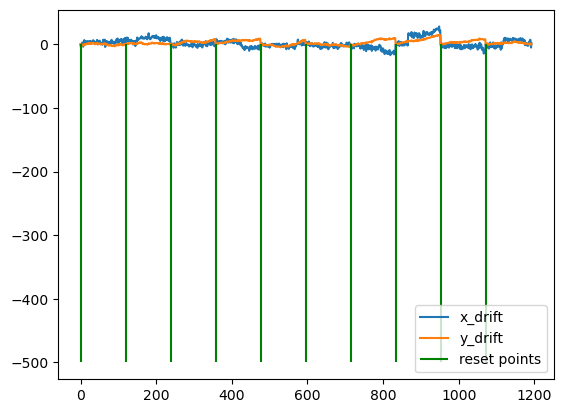

In [132]:
plt.clf()
plt.plot(x, label = 'x_drift')
plt.plot(y, label = 'y_drift')
plt.vlines(chunks, ymin = -500, ymax = 0, label = 'reset points', color = 'g')
plt.legend(loc="lower right")
plt.show()

# previous, crop 500

In [189]:
transform_path = glob.glob(f'/home/nathan/data/kraken/ras/ND0010/Pos5/*_transform_tensor.npy')

In [190]:
transform_path

['/home/nathan/data/kraken/ras/ND0010/Pos5/gfp_transform_tensor.npy']

In [191]:
transform = np.load(transform_path[0])

In [192]:
x, y =transform[:,0,2], transform[:,1,2]

print(max(x, key=abs),np.argmax(x))
print(max(y, key=abs),np.argmax(y))

22.099950939526508 948
-31.263305304775002 1192


In [193]:
chunks = np.arange(0,1190, 119)

In [194]:
chunks

array([   0,  119,  238,  357,  476,  595,  714,  833,  952, 1071])

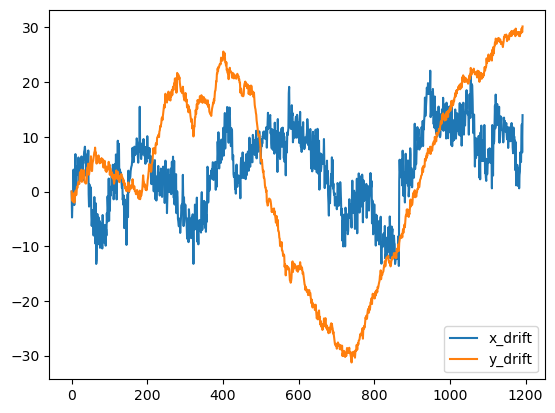

In [196]:
plt.clf()
plt.plot(x, label = 'x_drift')
plt.plot(y, label = 'y_drift')
#plt.vlines(chunks, ymin = -max(max(x, key=abs),max(y, key=abs)), ymax = +max(max(x, key=abs),max(y, key=abs)), label = 'reset points', color = 'g')
plt.legend(loc="lower right")
plt.show()

# first ref 500

In [177]:
transform_path = glob.glob(f'/home/nathan/data/kraken/ras/ND0010/Pos5/*_transform_tensor_{1}.npy')

In [178]:
transform_path

['/home/nathan/data/kraken/ras/ND0010/Pos5/gfp_transform_tensor_1.npy']

In [179]:
transform = np.load(transform_path[0])

In [180]:
x, y =transform[:,0,2], transform[:,1,2]

print(max(x, key=abs),np.argmax(x))
print(max(y, key=abs),np.argmax(y))

39.094666439187165 190
56.35300693952979 764


In [181]:
chunks = np.arange(0,1190, 119)

In [182]:
chunks

array([   0,  119,  238,  357,  476,  595,  714,  833,  952, 1071])

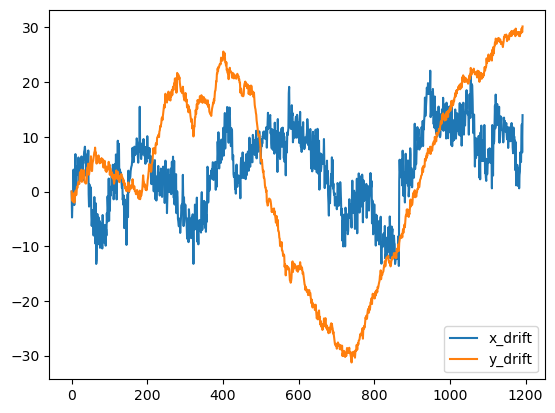

In [197]:
plt.clf()
plt.plot(x, label = 'x_drift')
plt.plot(y, label = 'y_drift')
#plt.vlines(chunks, ymin = -max(max(x, key=abs),max(y, key=abs)), ymax = +max(max(x, key=abs),max(y, key=abs)), label = 'reset points', color = 'g')
plt.legend(loc="lower right")
plt.show()

### less confluent track

In [299]:
transform_path = glob.glob(f'/home/nathan/data/kraken/ras/ND0010/Pos0/*_transform_tensor_{13}.npy')

In [300]:
transform_path

['/home/nathan/data/kraken/ras/ND0010/Pos0/gfp_transform_tensor_13.npy']

In [301]:
transform = np.load(transform_path[0])

In [302]:
transform

array([[[ 1.        ,  0.        ,  0.        ],
        [ 0.        ,  1.        ,  0.        ],
        [ 0.        ,  0.        ,  1.        ]],

       [[ 1.        ,  0.        , -3.58272444],
        [ 0.        ,  1.        ,  0.59928724],
        [ 0.        ,  0.        ,  1.        ]],

       [[ 1.        ,  0.        , -1.13991827],
        [ 0.        ,  1.        ,  1.76137428],
        [ 0.        ,  0.        ,  1.        ]],

       ...,

       [[ 1.        ,  0.        , 20.35231281],
        [ 0.        ,  1.        ,  1.37024496],
        [ 0.        ,  0.        ,  1.        ]],

       [[ 1.        ,  0.        , 18.87726199],
        [ 0.        ,  1.        ,  0.7742306 ],
        [ 0.        ,  0.        ,  1.        ]],

       [[ 1.        ,  0.        , 18.52109241],
        [ 0.        ,  1.        ,  1.66755935],
        [ 0.        ,  0.        ,  1.        ]]])

In [303]:
x, y =transform[:,0,2], transform[:,1,2]

print(max(x, key=abs),np.argmax(x))
print(max(y, key=abs),np.argmax(y))

-77.77216802375074 949
-489.71647589498644 15


In [304]:
chunks = np.arange(0,1190, 119)

In [305]:
chunks

array([   0,  119,  238,  357,  476,  595,  714,  833,  952, 1071])

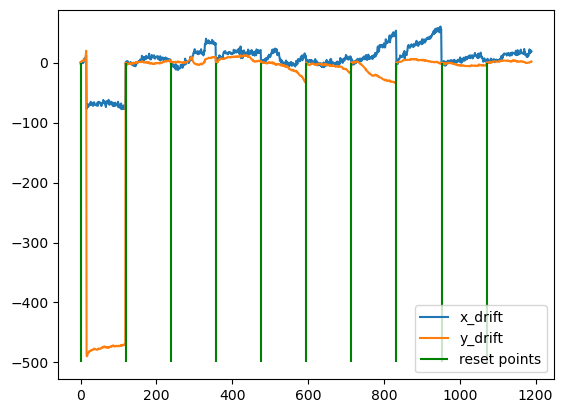

In [306]:
plt.clf()
plt.plot(x, label = 'x_drift')
plt.plot(y, label = 'y_drift')
plt.vlines(chunks, ymin = -500, ymax = 0, label = 'reset points', color = 'g')
plt.legend(loc="lower right")
plt.show()

# taking jumpy transform and trying to fix

In [308]:
[xi for xi in x]

[0.0,
 -3.5827244407272474,
 -1.139918267684834,
 -1.4559959529967728,
 -0.687621485371551,
 -0.6780301552702213,
 2.1917630241982806,
 -0.38034429252525115,
 0.11775551126936534,
 4.294891261130033,
 6.678624509537258,
 5.96761738349187,
 4.9221708028969715,
 4.856071773045414,
 10.355918898396453,
 12.299937755936412,
 -77.31864247026738,
 -74.22735916684803,
 -74.50602992758525,
 -69.7956828920095,
 -72.49477068727856,
 -73.54015631035645,
 -70.86149134150457,
 -69.32318931537463,
 -69.79992624529962,
 -70.5200410243774,
 -68.10172075647552,
 -65.2511148160063,
 -70.6833028270147,
 -69.67391390669309,
 -69.09444653743992,
 -68.5856778530441,
 -67.42740156049979,
 -72.21368567926595,
 -66.96527790952064,
 -70.40425233653673,
 -66.2594343133635,
 -68.66038079496116,
 -69.35536477844744,
 -70.03557886959959,
 -70.76983232584234,
 -71.25663882430683,
 -70.55318018777155,
 -71.62301277549273,
 -70.90202633283582,
 -66.52508894830521,
 -71.93480169696272,
 -66.62660203303528,
 -65.3990095

In [311]:
x_2 = []
for n, xi in enumerate(x):
    if n == 0:
        continue
    if xi == 0:
        x2 = [xi + x[n-1] for n, xi in enumerate(x)]
#         x_2.append(xi)
#     x_2.append(xi)

In [312]:
x2

[18.521092410201845,
 -3.5827244407272474,
 -4.7226427084120814,
 -2.595914220681607,
 -2.1436174383683237,
 -1.3656516406417722,
 1.5137328689280594,
 1.8114187316730295,
 -0.2625887812558858,
 4.412646772399398,
 10.97351577066729,
 12.646241893029128,
 10.889788186388841,
 9.778242575942386,
 15.211990671441868,
 22.655856654332865,
 -65.01870471433097,
 -151.5460016371154,
 -148.73338909443328,
 -144.30171281959474,
 -142.29045357928806,
 -146.034926997635,
 -144.40164765186103,
 -140.1846806568792,
 -139.12311556067425,
 -140.31996726967702,
 -138.62176178085292,
 -133.3528355724818,
 -135.934417643021,
 -140.3572167337078,
 -138.768360444133,
 -137.68012439048402,
 -136.0130794135439,
 -139.64108723976574,
 -139.1789635887866,
 -137.36953024605737,
 -136.66368664990023,
 -134.91981510832466,
 -138.0157455734086,
 -139.39094364804703,
 -140.80541119544193,
 -142.02647115014918,
 -141.80981901207838,
 -142.17619296326427,
 -142.52503910832854,
 -137.42711528114103,
 -138.4598906452

# gradient analysis on all transforms

link to confluency? 

In [257]:
grad_dict = {}
for tensor_ID in range(0, 16):
    if tensor_ID == 0:
        tensor_ID = '' 
    else:
        tensor_ID = '_'+ str(tensor_ID)
    for pos in range(12):
        pos = 'Pos'+str(pos)
       
        transform_path = glob.glob(f'/home/nathan/data/kraken/ras/ND0010/{pos}/*_transform_tensor{tensor_ID}.npy')
        print(transform_path)
        if transform_path:
            transform = np.load(transform_path[0])
            x, y =transform[:,0,2], transform[:,1,2]
            gradient_xy = (abs(np.gradient(x)),abs(np.gradient(y)))
            mean_grad_xy = np.mean(gradient_xy[0]),np.mean(gradient_xy[1])
            grad_dict[transform_path[0].split('ras/')[-1].replace('transform_tensor', 'tt')] = mean_grad_xy


['/home/nathan/data/kraken/ras/ND0010/Pos0/gfp_transform_tensor.npy']
['/home/nathan/data/kraken/ras/ND0010/Pos1/gfp_transform_tensor.npy']
['/home/nathan/data/kraken/ras/ND0010/Pos2/gfp_transform_tensor.npy']
['/home/nathan/data/kraken/ras/ND0010/Pos3/gfp_transform_tensor.npy']
['/home/nathan/data/kraken/ras/ND0010/Pos4/gfp_transform_tensor.npy']
['/home/nathan/data/kraken/ras/ND0010/Pos5/gfp_transform_tensor.npy']
['/home/nathan/data/kraken/ras/ND0010/Pos6/gfp_transform_tensor.npy']
['/home/nathan/data/kraken/ras/ND0010/Pos7/gfp_transform_tensor.npy']
['/home/nathan/data/kraken/ras/ND0010/Pos8/gfp_transform_tensor.npy']
['/home/nathan/data/kraken/ras/ND0010/Pos9/gfp_transform_tensor.npy']
['/home/nathan/data/kraken/ras/ND0010/Pos10/gfp_transform_tensor.npy']
['/home/nathan/data/kraken/ras/ND0010/Pos11/gfp_transform_tensor.npy']
['/home/nathan/data/kraken/ras/ND0010/Pos0/gfp_transform_tensor_1.npy']
['/home/nathan/data/kraken/ras/ND0010/Pos1/gfp_transform_tensor_1.npy']
['/home/nathan

In [258]:
grad_dict

{'ND0010/Pos0/gfp_tt.npy': (1.4843621533972915, 1.2413001133347488),
 'ND0010/Pos1/gfp_tt.npy': (1.2566549172073287, 0.43184850972925926),
 'ND0010/Pos2/gfp_tt.npy': (1.1665968368086606, 0.4791987617138887),
 'ND0010/Pos3/gfp_tt.npy': (1.1400061257915188, 0.37641395099548147),
 'ND0010/Pos4/gfp_tt.npy': (1.2756693278542548, 0.5098970612764901),
 'ND0010/Pos5/gfp_tt.npy': (1.2912138753271822, 0.336069282346069),
 'ND0010/Pos6/gfp_tt.npy': (1.3464987380840086, 0.5235994232911758),
 'ND0010/Pos7/gfp_tt.npy': (1.3526518144146147, 0.3753819034521339),
 'ND0010/Pos8/gfp_tt.npy': (1.4061005964464912, 0.44611557523983836),
 'ND0010/Pos9/gfp_tt.npy': (1.3732648217002605, 0.3645562802722538),
 'ND0010/Pos10/gfp_tt.npy': (1.4646134444137533, 0.3990427142790616),
 'ND0010/Pos11/gfp_tt.npy': (1.5235201757117744, 0.33395938768769884),
 'ND0010/Pos0/gfp_tt_1.npy': (3.8048491164579157, 2.6977497558960475),
 'ND0010/Pos1/gfp_tt_1.npy': (3.2054083028750293, 2.4783197231656118),
 'ND0010/Pos2/gfp_tt_1.np

In [259]:
{k: v for k, v in sorted(grad_dict.items(), key=lambda item: item[1])}

{'ND0010/Pos3/gfp_tt.npy': (1.1400061257915188, 0.37641395099548147),
 'ND0010/Pos2/gfp_tt_13.npy': (1.1488721075882264, 0.4010962800229331),
 'ND0010/Pos2/gfp_tt_8.npy': (1.1539112318949425, 0.4042941916643572),
 'ND0010/Pos2/gfp_tt_14.npy': (1.1549693026765107, 0.40200620844030754),
 'ND0010/Pos2/gfp_tt.npy': (1.1665968368086606, 0.4791987617138887),
 'ND0010/Pos3/gfp_tt_13.npy': (1.1967844129395195, 0.3451689735144937),
 'ND0010/Pos3/gfp_tt_14.npy': (1.198388767158108, 0.34659860411648863),
 'ND0010/Pos3/gfp_tt_8.npy': (1.2001068251509177, 0.35664228249703717),
 'ND0010/Pos2/rfp_tt_11.npy': (1.216489478418328, 2.50534577038342),
 'ND0010/Pos4/gfp_tt_14.npy': (1.2277483045643045, 0.35157684219951607),
 'ND0010/Pos4/gfp_tt_13.npy': (1.2380718646830324, 0.35974865411479356),
 'ND0010/Pos1/gfp_tt_14.npy': (1.2526217047018138, 0.34898648134966836),
 'ND0010/Pos1/mask_tt_9.npy': (1.2531367138605718, 0.2562613978737261),
 'ND0010/Pos1/gfp_tt.npy': (1.2566549172073287, 0.43184850972925926),

### sum gradients

In [261]:
grad_dict_sum = {}
for tensor_ID in range(0, 16):
    if tensor_ID == 0:
        tensor_ID = '' 
    else:
        tensor_ID = '_'+ str(tensor_ID)
    for pos in range(12):
        pos = 'Pos'+str(pos)
       
        transform_path = glob.glob(f'/home/nathan/data/kraken/ras/ND0010/{pos}/*_transform_tensor{tensor_ID}.npy')
        print(transform_path)
        if transform_path:
            transform = np.load(transform_path[0])
            x, y =transform[:,0,2], transform[:,1,2]
            gradient_xy = (abs(np.gradient(x)),abs(np.gradient(y)))
            mean_grad_xy = np.mean(gradient_xy[0])+np.mean(gradient_xy[1])
            grad_dict_sum[transform_path[0].split('ras/')[-1].replace('transform_tensor', 'tt')] = mean_grad_xy


['/home/nathan/data/kraken/ras/ND0010/Pos0/gfp_transform_tensor.npy']
['/home/nathan/data/kraken/ras/ND0010/Pos1/gfp_transform_tensor.npy']
['/home/nathan/data/kraken/ras/ND0010/Pos2/gfp_transform_tensor.npy']
['/home/nathan/data/kraken/ras/ND0010/Pos3/gfp_transform_tensor.npy']
['/home/nathan/data/kraken/ras/ND0010/Pos4/gfp_transform_tensor.npy']
['/home/nathan/data/kraken/ras/ND0010/Pos5/gfp_transform_tensor.npy']
['/home/nathan/data/kraken/ras/ND0010/Pos6/gfp_transform_tensor.npy']
['/home/nathan/data/kraken/ras/ND0010/Pos7/gfp_transform_tensor.npy']
['/home/nathan/data/kraken/ras/ND0010/Pos8/gfp_transform_tensor.npy']
['/home/nathan/data/kraken/ras/ND0010/Pos9/gfp_transform_tensor.npy']
['/home/nathan/data/kraken/ras/ND0010/Pos10/gfp_transform_tensor.npy']
['/home/nathan/data/kraken/ras/ND0010/Pos11/gfp_transform_tensor.npy']
['/home/nathan/data/kraken/ras/ND0010/Pos0/gfp_transform_tensor_1.npy']
['/home/nathan/data/kraken/ras/ND0010/Pos1/gfp_transform_tensor_1.npy']
['/home/nathan

In [290]:
grad_dict_sum = {k: v for k, v in sorted(grad_dict_sum.items(), key=lambda item: item[1])}

# plot dict entries along a graph

In [291]:
grad_dict_sum.values()

dict_values([1.5093981117342978, 1.5164200767870004, 1.5419533864540131, 1.5449873712745965, 1.5499683876111596, 1.556749107647955, 1.5569755111168182, 1.5582054235592997, 1.5793251467638205, 1.597820518797826, 1.6016081860514821, 1.606329349750252, 1.6272831576732512, 1.637077341179988, 1.640226777787749, 1.641486817824358, 1.6457955985225492, 1.688503426936588, 1.7197200039550438, 1.72729341148281, 1.7280337178667486, 1.7315816459078062, 1.732639765192698, 1.7372545392827543, 1.7378211019725143, 1.7483552729756833, 1.7564843676558595, 1.767960033198451, 1.785566389130745, 1.8522161716863295, 1.8574795633994734, 1.8635179856300068, 1.8636561586928149, 1.8700981613751844, 1.8722646557679927, 1.8739690235806319, 1.8797871638261143, 1.8950985331023646, 1.902106229005259, 1.9400999690174516, 1.9402497137255985, 1.9695413832660134, 1.9704119958342858, 1.9708455333584434, 1.9824729524234102, 2.0002758440251034, 2.1047882750367477, 2.167525803109754, 2.18493553849101, 2.3967194010492276, 2.4

In [292]:
grad_dict_sum.keys()

dict_keys(['ND0010/Pos1/mask_tt_9.npy', 'ND0010/Pos3/gfp_tt.npy', 'ND0010/Pos3/gfp_tt_13.npy', 'ND0010/Pos3/gfp_tt_14.npy', 'ND0010/Pos2/gfp_tt_13.npy', 'ND0010/Pos3/gfp_tt_8.npy', 'ND0010/Pos2/gfp_tt_14.npy', 'ND0010/Pos2/gfp_tt_8.npy', 'ND0010/Pos4/gfp_tt_14.npy', 'ND0010/Pos4/gfp_tt_13.npy', 'ND0010/Pos1/gfp_tt_14.npy', 'ND0010/Pos1/gfp_tt_13.npy', 'ND0010/Pos5/gfp_tt.npy', 'ND0010/Pos5/gfp_tt_13.npy', 'ND0010/Pos4/irfp_tt_10.npy', 'ND0010/Pos5/gfp_tt_14.npy', 'ND0010/Pos2/gfp_tt.npy', 'ND0010/Pos1/gfp_tt.npy', 'ND0010/Pos9/gfp_tt_14.npy', 'ND0010/Pos9/gfp_tt_13.npy', 'ND0010/Pos7/gfp_tt.npy', 'ND0010/Pos8/gfp_tt_14.npy', 'ND0010/Pos7/irfp_tt_10.npy', 'ND0010/Pos8/gfp_tt_13.npy', 'ND0010/Pos9/gfp_tt.npy', 'ND0010/Pos7/gfp_tt_14.npy', 'ND0010/Pos7/gfp_tt_13.npy', 'ND0010/Pos6/irfp_tt_10.npy', 'ND0010/Pos4/gfp_tt.npy', 'ND0010/Pos8/gfp_tt.npy', 'ND0010/Pos11/gfp_tt.npy', 'ND0010/Pos9/irfp_tt_10.npy', 'ND0010/Pos10/gfp_tt.npy', 'ND0010/Pos6/gfp_tt.npy', 'ND0010/Pos5/gfp_tt_8.npy', 'ND0

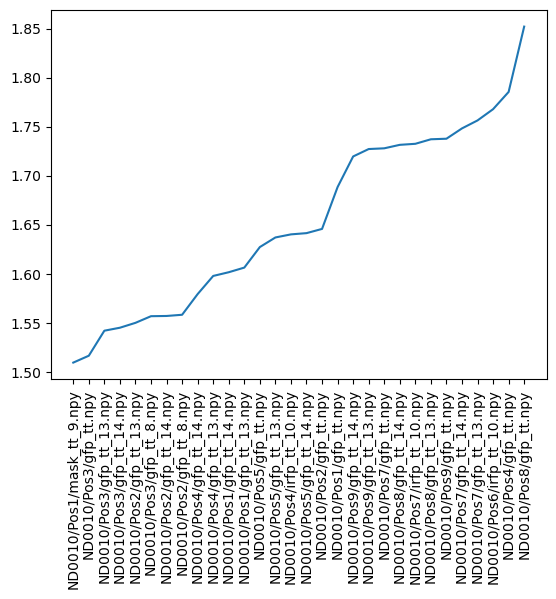

In [298]:
N = 30
plt.clf()
plt.plot([value for n, value in enumerate(grad_dict_sum.values()) if n <N])
plt.xticks(range(0, N), [key for n, key in enumerate(grad_dict_sum.keys()) if n <N], rotation =90)
plt.show()

# comparing the gradient of hi vs low

In [241]:
transform_path = glob.glob(f'/home/nathan/data/kraken/ras/ND0010/Pos0/*_transform_tensor_{13}.npy')

In [242]:
transform = np.load(transform_path[0])

In [243]:
transform

array([[[ 1.        ,  0.        ,  0.        ],
        [ 0.        ,  1.        ,  0.        ],
        [ 0.        ,  0.        ,  1.        ]],

       [[ 1.        ,  0.        , -3.58272444],
        [ 0.        ,  1.        ,  0.59928724],
        [ 0.        ,  0.        ,  1.        ]],

       [[ 1.        ,  0.        , -1.13991827],
        [ 0.        ,  1.        ,  1.76137428],
        [ 0.        ,  0.        ,  1.        ]],

       ...,

       [[ 1.        ,  0.        , 20.35231281],
        [ 0.        ,  1.        ,  1.37024496],
        [ 0.        ,  0.        ,  1.        ]],

       [[ 1.        ,  0.        , 18.87726199],
        [ 0.        ,  1.        ,  0.7742306 ],
        [ 0.        ,  0.        ,  1.        ]],

       [[ 1.        ,  0.        , 18.52109241],
        [ 0.        ,  1.        ,  1.66755935],
        [ 0.        ,  0.        ,  1.        ]]])

In [244]:
x, y =transform[:,0,2], transform[:,1,2]

print(max(x, key=abs),np.argmax(x))
print(max(y, key=abs),np.argmax(y))

-77.77216802375074 949
-489.71647589498644 15


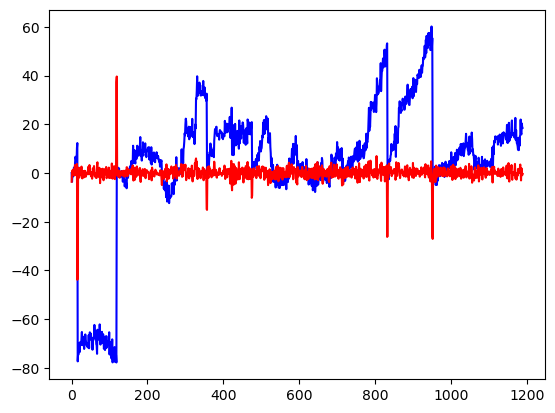

In [245]:
plt.clf()
plt.plot(x, c='b')
plt.plot(np.gradient(x), c = 'r')
plt.show()

In [246]:
np.mean(abs(np.gradient(x)))

1.637338717100886

In [235]:
transform_path = glob.glob(f'/home/nathan/data/kraken/ras/ND0010/Pos0/*_transform_tensor.npy')

In [236]:
transform = np.load(transform_path[0])

In [237]:
transform

array([[[  1.        ,   0.        ,   0.        ],
        [  0.        ,   1.        ,   0.        ],
        [  0.        ,   0.        ,   1.        ]],

       [[  1.        ,   0.        ,  -3.75468314],
        [  0.        ,   1.        ,   2.33772271],
        [  0.        ,   0.        ,   1.        ]],

       [[  1.        ,   0.        ,  -1.58642756],
        [  0.        ,   1.        ,   3.51430197],
        [  0.        ,   0.        ,   1.        ]],

       ...,

       [[  1.        ,   0.        , -30.63437678],
        [  0.        ,   1.        , -10.45583243],
        [  0.        ,   0.        ,   1.        ]],

       [[  1.        ,   0.        , -31.84385284],
        [  0.        ,   1.        , -11.21504937],
        [  0.        ,   0.        ,   1.        ]],

       [[  1.        ,   0.        , -31.88373742],
        [  0.        ,   1.        , -10.51351222],
        [  0.        ,   0.        ,   1.        ]]])

In [238]:
x, y =transform[:,0,2], transform[:,1,2]

print(max(x, key=abs),np.argmax(x))
print(max(y, key=abs),np.argmax(y))

-177.96385094299026 10
410.7260102491418 15


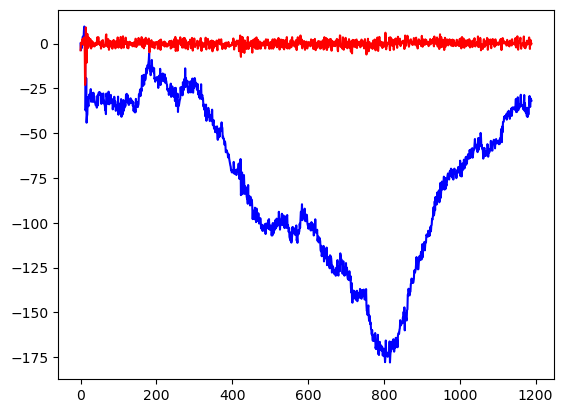

In [239]:
plt.clf()
plt.plot(x, c='b')
plt.plot(np.gradient(x), c = 'r')
plt.show()

In [240]:
np.mean(abs(np.gradient(x)))

1.4843621533972915

In [83]:
image_path = f'/home/nathan/dtransform_path = glob.glob(f'/home/nathan/data/kraken/ras/ND0010/Pos0/*_transform_tensor_{13}.npy')

transform = np.load(transform_path[0])

transform

x, y =transform[:,0,2], transform[:,1,2]

print(max(x, key=abs),np.argmax(x))
print(max(y, key=abs),np.argmax(y))

plt.clf()
plt.plot(x, c='b')
plt.plot(np.gradient(x), c = 'r')
plt.show()ata/kraken/ras/ND0012/Pos0/Pos0_images'

In [84]:
images = DaskOctopusLiteLoader(image_path, remove_background = False, crop = None)

In [85]:
images['mask'][0].compute().shape

(1352, 1688)

In [86]:
images['rfp'][0].compute().shape

(1352, 1688)

In [87]:
images['gfp'][0].compute().shape

(1352, 1688)

In [88]:
images['gfp']

dask.array<stack, shape=(1735, 1352, 1688), dtype=uint8, chunksize=(1, 1352, 1688), chunktype=numpy.ndarray>

In [89]:
x[100:125]

array([-74.49587095, -69.28573469, -73.14696727, -72.05509608,
       -71.32302739, -76.09249546, -73.44043916, -68.2779053 ,
       -77.72896017, -72.90119131, -74.28366379, -77.09191097,
       -74.76226954, -71.45140918, -77.48092233, -76.45616118,
       -75.75757086, -74.68703179, -77.77216802,   0.        ,
         1.45408388,  -0.49850783,   2.20540161,  -0.08591187,
        -0.76041638])